In [252]:
from data_load import *
from dfTest import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [253]:
price = pd.DataFrame(data["Adj Close"])
price.columns = ['Adj Close']


In [254]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

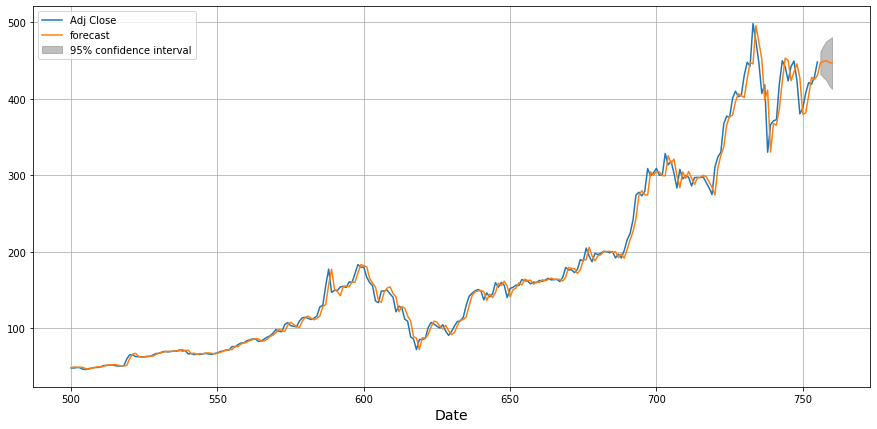

In [255]:

model = ARIMA(price, order=(4, 1, 1))
results = model.fit()

fig, ax = plt.subplots(figsize = (15,7))
ax = price.loc[500:].plot(ax=ax)
fig = results.plot_predict(500,760, ax=ax, plot_insample = False)

plt.xlabel("Date", fontsize=14)
plt.grid(True)
plt.show()

In [256]:
import yfinance as yf
import pandas_datareader.data as pdr
data = pdr.get_data_yahoo("TSLA", start = "2020-10-01", end = "2020-10-10")

print(data['Adj Close'])

Date
2020-10-01    448.160004
2020-10-02    415.089996
2020-10-05    425.679993
2020-10-06    413.980011
2020-10-07    425.299988
2020-10-08    425.920013
2020-10-09    434.000000
Name: Adj Close, dtype: float64


In [260]:
forecast = results.forecast(7)[2]

df = data['Adj Close']
df = df.index
df = np.array(df)
df = np.datetime_as_string(df, unit = 'D')

print('Confidence interval for Tesla Stock')
for i in range(len(forecast)):
    print('The day of {}\t\t{}'.format(df[i],forecast[i]))
    
    

Confidence interval for Tesla Stock
The day of 2020-10-01		[432.28248069 461.62259507]
The day of 2020-10-02		[428.30878569 469.20118375]
The day of 2020-10-05		[424.62817101 475.20912545]
The day of 2020-10-06		[417.39893475 477.78334246]
The day of 2020-10-07		[412.99253803 480.43457299]
The day of 2020-10-08		[409.35429903 482.6084032 ]
The day of 2020-10-09		[406.12357358 484.38112946]
